In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read in the dataset and set the correct data types.

In [9]:
df = pd.read_csv('./synthetic_data.csv', parse_dates=[4])

df['deviceBrowser'] = df['deviceBrowser'].astype('category')
df['marketing_channel'] = df['marketing_channel'].astype('category')
df['which_OS'] = df['which_OS'].astype('category')
df['product_id'] = df['product_id'].astype('category')


df['transaction'] = df.transaction.replace(to_replace=[False, True], value=[0, 1])

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218719 entries, 0 to 218718
Data columns (total 9 columns):
deviceBrowser        218719 non-null category
marketing_channel    218719 non-null category
session_id           218719 non-null object
transaction          218719 non-null int64
visitStartTime       218719 non-null datetime64[ns]
which_OS             218719 non-null category
product_id           10791 non-null category
revenue              218719 non-null int64
customer_id          218719 non-null int64
dtypes: category(4), datetime64[ns](1), int64(3), object(1)
memory usage: 9.2+ MB
None


,deviceBrowser,marketing_channel,session_id,transaction,visitStartTime,which_OS,product_id,revenue,customer_id
0,edge,seo,08559f34-6ebe-4014-b177-64e6e1d96b6c,0,2016-01-01 12:32:11,linux,NaN,0,10639296
1,other,other,11733b99-9402-40bd-bba6-52769273d516,0,2016-01-01 22:34:49,linux,NaN,0,91639689
2,other,direct,aa1bca58-3e37-47f9-90a3-4e97ae6e99c9,0,2016-01-01 16:15:44,windows,NaN,0,27103236
3,apple,seo,e0501a92-a9ec-4b1f-aee9-8bb745f9ef74,0,2016-01-01 01:34:40,windows,NaN,0,50349749
4,chrome,other,50be4d41-6f71-4868-a472-24ff4fe3005e,0,2016-01-01 09:01:27,windows,NaN,0,17463285


#### Let's extract some features

In [10]:
df['day_of_week'] = df.visitStartTime.apply(lambda x: x.dayofweek).astype('category')
df['month'] = df.visitStartTime.apply(lambda x: x.month).astype('category')

#### Let's plot daily sales by product_id

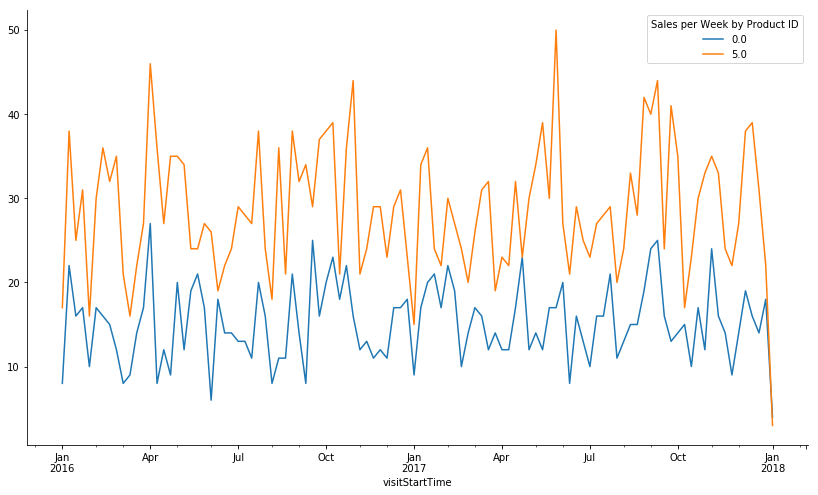

In [21]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

df.loc[df['product_id'].isin(df['product_id'] \
                             .value_counts() \
                             .index[:2])] \
    .set_index('visitStartTime') \
    .groupby(['product_id', pd.Grouper(freq='W')]) \
    .agg('size') \
    .unstack(0) \
    .fillna(0) \
    .rename_axis("Sales per Week by Product ID", axis=1) \
    .plot(ax=ax)
    
sns.despine()

#### Here we 